# MPhys Project: Noise Modelling

In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# noise in GeV 
noise = [0.004, 0.0045, 0.004, 0.008, 0.011, 0.015, 0.018, 0.021]

# distance in cm 
distance = []

# number of layers (0.5cm thick)
layers = []

In [3]:
# first layer is 2 cm thick 
# remaining layers are 6.15 cm thick 

for i in range(len(noise)):
    if i == 0:
        distance.append(2)
        layers.append(4)
    if i > 0:
        distance.append((distance[i-1] + 6.15))
        layers.append((layers[i-1] + 12.3))

In [4]:
print(distance)

[2, 8.15, 14.3, 20.450000000000003, 26.6, 32.75, 38.9, 45.05]


In [5]:
print(layers)

[4, 16.3, 28.6, 40.900000000000006, 53.2, 65.5, 77.8, 90.1]


## Fitting Noise as a Function of Calorimeter Length

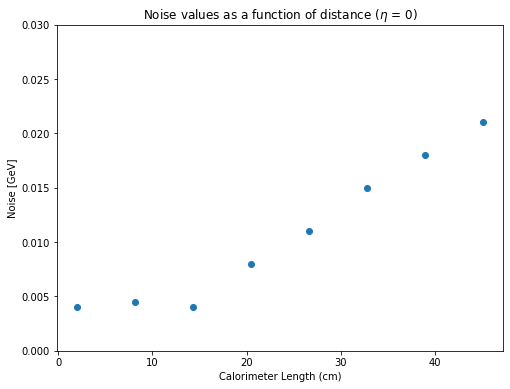

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(distance,noise)
plt.xlabel("Calorimeter Length (cm)")
plt.ylim(0,0.03)
plt.ylabel("Noise [GeV]")
plt.title("Noise values as a function of distance ($\eta$ = 0)")
plt.savefig("NoiseAgainstDistance.pdf")
plt.show()

In [7]:
# flat fit for first 3 data points
x = distance[0:3]
y = noise[0:3]
z = np.polyfit(x, y, 0)

print(z)

[0.00416667]


In [8]:
# linear fit for first 3 data points
x2 = distance[2:8]
y2 = noise[2:8]
z2 = np.polyfit(x2, y2, 1)

print(z2)

[ 0.00055285 -0.00357236]


In [9]:
def linearNoise(x):
    
    # gradient 
    m = z2[0]
    # intercept
    c = z2[1]
    
    # linear equation 
    y = m*x+c
    
    return y 

In [10]:
xVals = np.linspace(14,45,50)
yVals = []

for i in range(len(xVals)):
    y = linearNoise(xVals[i])
    yVals.append(y)
    
xFlat = np.linspace(0,14,30)
yFlat = []

for i in range(len(xFlat)):
    yFlat.append(z)

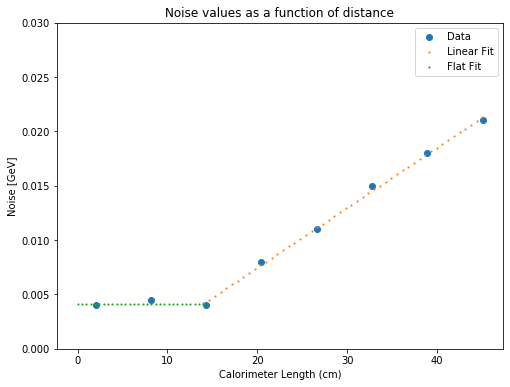

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(distance,noise, label='Data')
plt.scatter(xVals,yVals, label='Linear Fit', marker='.', s=5)
plt.scatter(xFlat,yFlat, label='Flat Fit', marker='.', s=5)
plt.xlabel("Calorimeter Length (cm)")
plt.ylim(0,0.03)
plt.ylabel("Noise [GeV]")
plt.legend()
plt.title("Noise values as a function of distance")
plt.savefig("NoiseAgainstDistanceFit.pdf")
plt.show()

## Fitting Noise as a Function of # Layers 

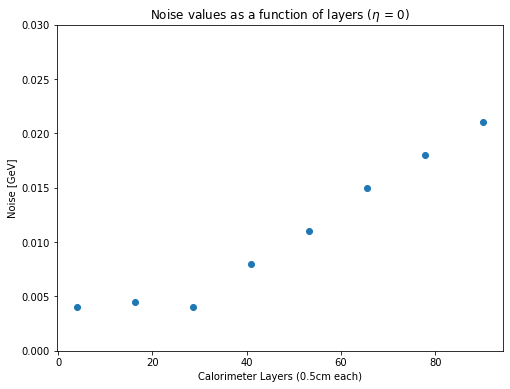

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(layers,noise)
plt.xlabel("Calorimeter Layers (0.5cm each)")
plt.ylim(0,0.03)
plt.ylabel("Noise [GeV]")
plt.title("Noise values as a function of layers ($\eta$ = 0)")
plt.savefig("NoiseAgainstLayers.pdf")
plt.show()

In [13]:
# flat fit for first 3 data points
x3 = layers[0:3]
y3 = noise[0:3]
z3 = np.polyfit(x3, y3, 0)

print(z3)

[0.00416667]


In [14]:
# linear fit for first 3 data points
x4 = layers[2:8]
y4 = noise[2:8]
z4 = np.polyfit(x4, y4, 1)

print(z4)

[ 0.00027642 -0.00357236]


In [15]:
def linNoise(x):
    
    # gradient 
    m = z4[0]
    # intercept
    c = z4[1]
    
    # linear equation 
    y = m*x+c
    
    return y 

In [16]:
xData = np.linspace(0,91,92)
yData = []

for i in range(len(xData)):
    if i < 29:
        yData.append(z3)
    if i > 28:
        y = linNoise(xData[i])
        yData.append(y)

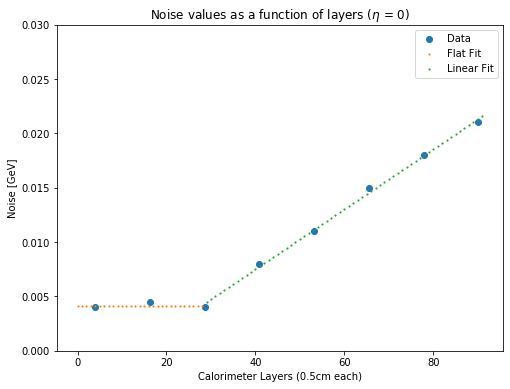

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(layers,noise,label='Data')
plt.scatter(xData[:29],yData[:29], label='Flat Fit', marker='.', s=5)
plt.scatter(xData[29:],yData[29:], label='Linear Fit', marker='.', s=5)
plt.xlabel("Calorimeter Layers (0.5cm each)")
plt.ylim(0,0.03)
plt.ylabel("Noise [GeV]")
plt.title("Noise values as a function of layers ($\eta$ = 0)")
plt.legend()
plt.savefig("NoiseAgainstLayersFit.pdf")
plt.show()

# Modelling with Default Noise

In [18]:
# load the data 
Layer1 = np.loadtxt("DefaultNoiseValues_Layer1.txt")
Layer2 = np.loadtxt("DefaultNoiseValues_Layer2.txt")
Layer3 = np.loadtxt("DefaultNoiseValues_Layer3.txt")
Layer4 = np.loadtxt("DefaultNoiseValues_Layer4.txt")
Layer5 = np.loadtxt("DefaultNoiseValues_Layer5.txt")
Layer6 = np.loadtxt("DefaultNoiseValues_Layer6.txt")
Layer7 = np.loadtxt("DefaultNoiseValues_Layer7.txt")
Layer8 = np.loadtxt("DefaultNoiseValues_Layer8.txt")


In [19]:
# n is the degree of the polynomial 
def Fit(x,y,n):
    z = np.polyfit(x, y, n)
    return z

In [33]:
nbins = len(Layer1)
flatZ = []
linearGrad = []
linearInt = []

for i in range(nbins):
    
    # degree of polynomials 
    nFlat = 0 
    nLinear = 1
    
    Noise = [Layer1[i],Layer2[i],Layer3[i],Layer4[i],Layer5[i],Layer6[i],Layer7[i],Layer8[i]]
    
    flatFit = Fit(layers[:3],Noise[:3],nFlat)
    linearFit = Fit(layers[2:],Noise[2:],nLinear)
    
    flatZ.append(flatFit)
    linearGrad.append(linearFit[0])
    linearInt.append(linearFit[1])
    
flatZ = np.array(flatZ)
linearGrad = np.array(linearGrad)
linearInt = np.array(linearInt)

np.savetxt("FlatFitResults.txt", flatZ)
np.savetxt("LinearFitResults_Gradient.txt", linearGrad)
np.savetxt("LinearFitResults_Intercept.txt", linearInt)

In [31]:
layers[2]

28.6

[0.0052884, 0.00627281, 0.00524821, 0.0105927, 0.0153055, 0.0196477, 0.023894, 0.0286341]


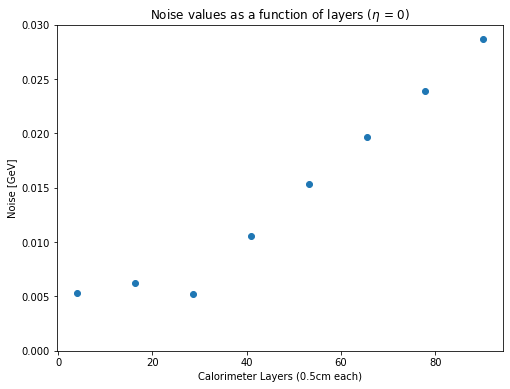

In [21]:
Noise_eta83 = [Layer1[82],Layer2[82],Layer3[82],Layer4[82],Layer5[82],Layer6[82],Layer7[82],Layer8[82]]
print(Noise_eta83)

plt.figure(figsize=(8,6))
plt.scatter(layers,Noise_eta83)
plt.xlabel("Calorimeter Layers (0.5cm each)")
plt.ylim(0,0.03)
plt.ylabel("Noise [GeV]")
plt.title("Noise values as a function of layers ($\eta$ = 0)")
# plt.savefig("NoiseAgainstLayers.pdf")
plt.show()